In [146]:
import numpy as np  # For numerical computations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For 2D plotting
import seaborn as sns  # For statistical data visualization
import warnings  # For handling warnings
warnings.filterwarnings('ignore')  # Ignore all warnings

#1. Data Inspection

#Data exploration

In [147]:
df = pd.read_csv('Life Expectancy Data.csv')

In [148]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [149]:
df.shape

(2938, 22)

In [150]:
df.columns.values.tolist()

['Country',
 'Year',
 'Status',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [151]:
# Renaming dataframe columns for clarity and to remove unnecessary spaces.

df = df.rename(columns={
    'Life expectancy ': 'Life expectancy', 
    'Measles ': 'Measles',
    ' BMI ': 'BMI',
    'under-five deaths ': 'under-five deaths',
    'Diphtheria ': 'Diphtheria',
    ' HIV/AIDS': 'HIV/AIDS',
    ' thinness  1-19 years': 'thinness 10-19 years',
    ' thinness 5-9 years': 'thinness 5-9 years'
})

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

Check central tendency and dispersion.
- mean, median, range, variance, standard deviation

In [153]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
Adult Mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


Check data distribution.

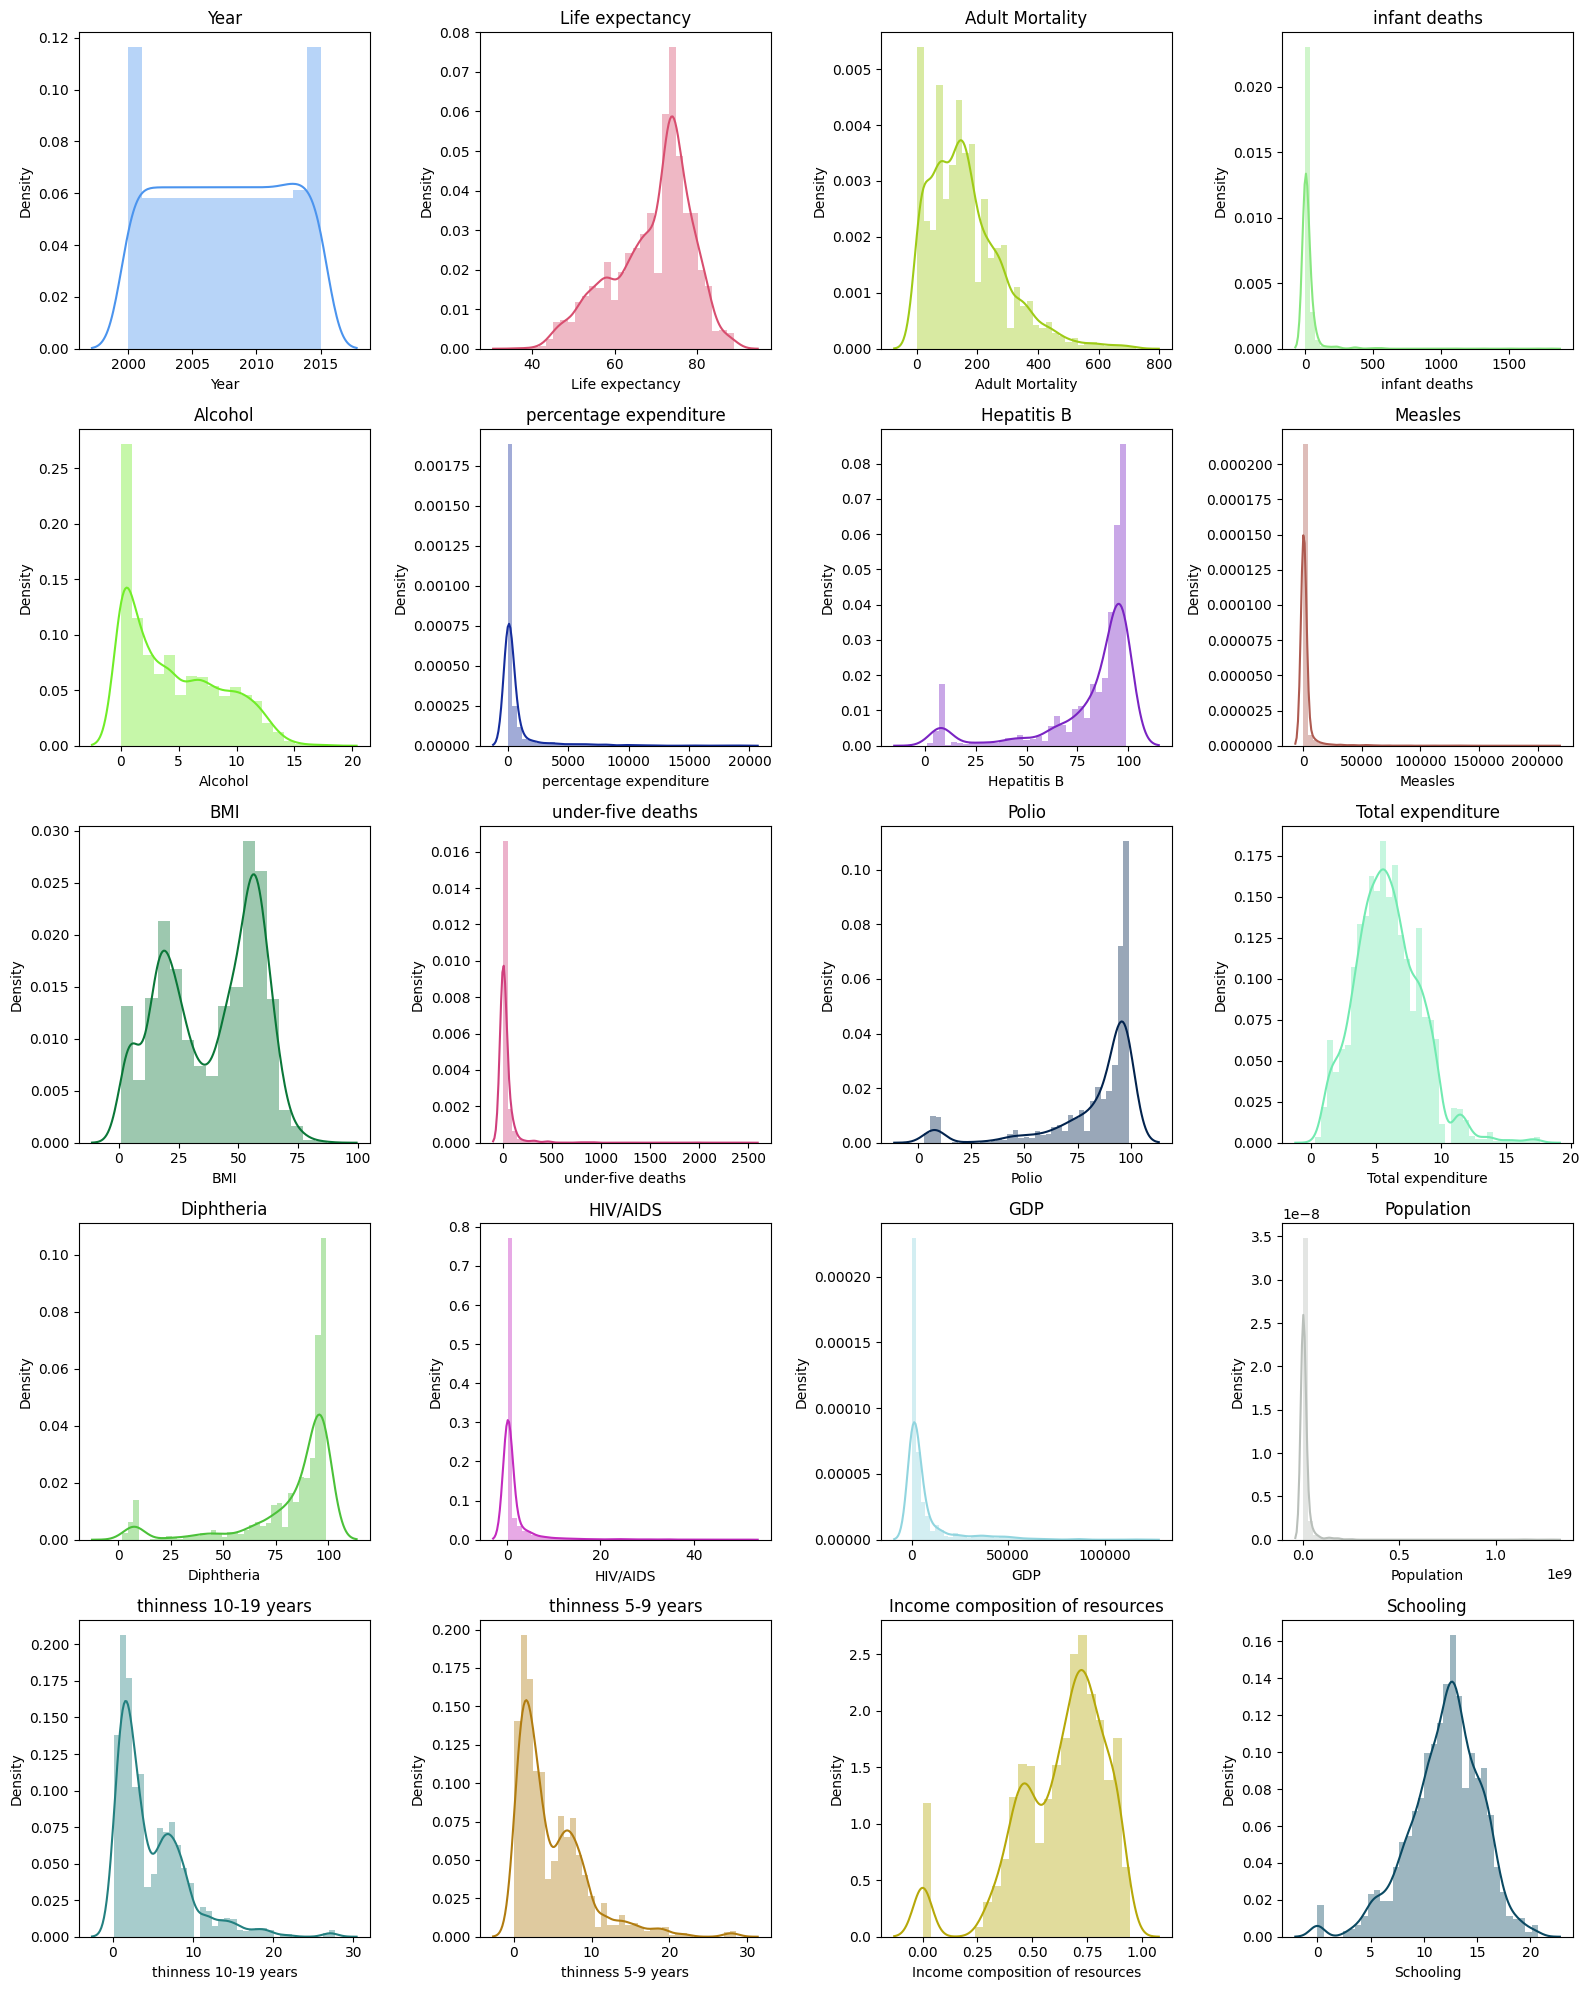

In [154]:
import random

# Define a function to generate a random color in hexadecimal format.
def rand_color():
    return "#" + "".join([random.choice('0123456789ABCDEF') for _ in range(6)])

# Select the numerical columns from the DataFrame.
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Calculate the number of rows needed for subplots.
num_cols = len(numerical_columns)
num_rows = num_cols // 4
num_rows += num_cols % 4
position = range(1, num_cols + 1)

# Create a figure for subplots.
fig = plt.figure(figsize=(16, num_rows * 4))

# Loop through each numerical column and create a subplot.
for k, col in zip(position, numerical_columns):
    ax = fig.add_subplot(num_rows, 4, k)
    sns.distplot(df[col], color=rand_color(), ax=ax)  # Plot the distribution with a random color.
    ax.set_title(col)  # Set the title of the subplot.

# Adjust the layout and display the plot.
plt.tight_layout()
plt.show()

Check for outliers.

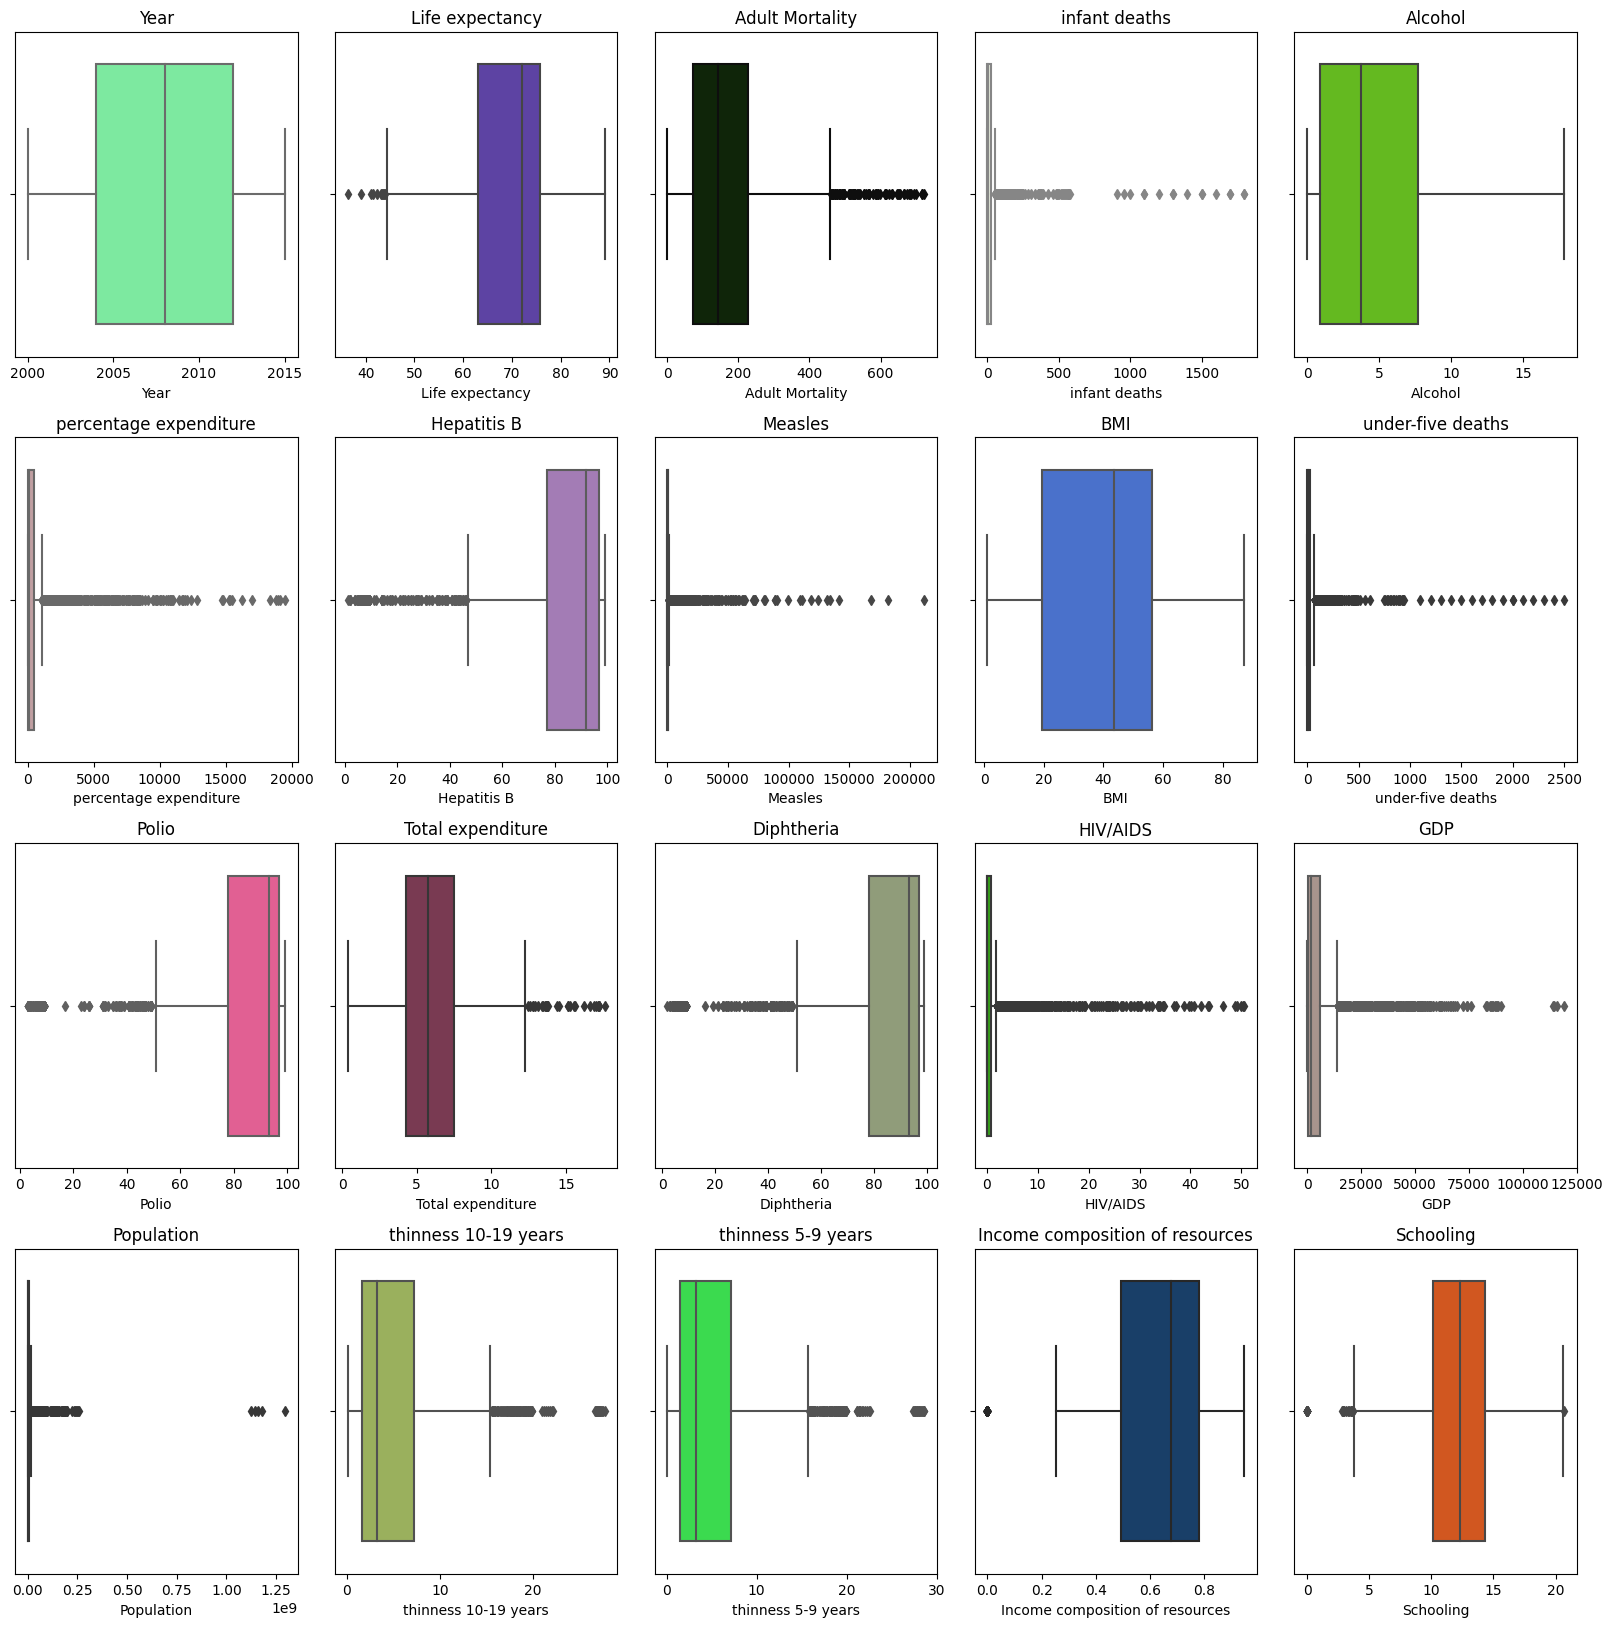

In [155]:
# Create a figure for subplots.
fig = plt.figure(figsize=(16, num_rows * 4))

# Loop through each numerical column and create a subplot.
for k, col in zip(position, numerical_columns):
    ax = fig.add_subplot(num_rows, 5, k)  # The change here indicates five plots per row instead of four.
    sns.boxplot(x=df[col], ax=ax, color=rand_color())  # Plot boxplot for each numerical column with a random color.
    ax.set_title(col)  # Set the title of the subplot.

# Adjust the layout and display the plot.
plt.tight_layout()
plt.show()

Check for correlation among attributes.

In [156]:
df.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


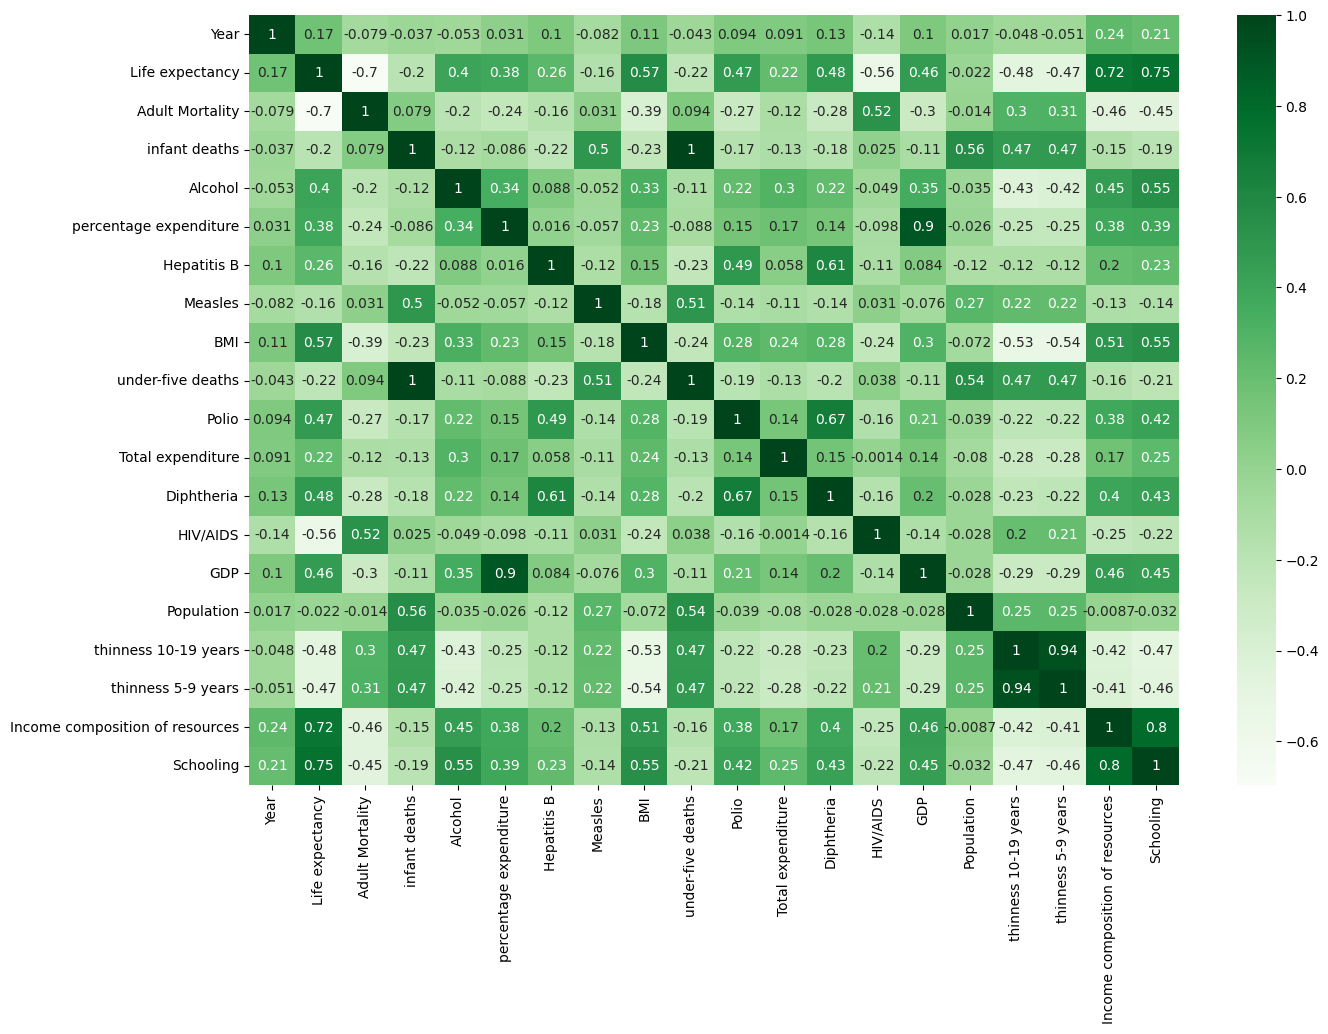

In [157]:
# Create a heatmap of the correlation matrix for the DataFrame.
# The correlation coefficient values are annotated on the heatmap.
# The color scheme used is 'Greens'.
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='Greens')
plt.show()

#2. Data Preprocessing

#Cleaning dirty data

In [158]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness 10-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

Life expectancy / Adult Mortality
- It was confirmed that the missing values, occurring 10 each, originated from non-existent country data.
- In other words, it is irrelevant to drop all missing value information.

In [159]:
df[df['Life expectancy'].isnull()]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
624,Cook Islands,2013,Developing,NaN,NaN,0,0.01,0.000000,98.0,0,...,98.0,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
769,Dominica,2013,Developing,NaN,NaN,0,0.01,11.419555,96.0,0,...,96.0,5.58,96.0,0.1,722.756650,NaN,2.7,2.6,0.721,12.7
1650,Marshall Islands,2013,Developing,NaN,NaN,0,0.01,871.878317,8.0,0,...,79.0,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0
1715,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
1812,Nauru,2013,Developing,NaN,NaN,0,0.01,15.606596,87.0,0,...,87.0,4.65,87.0,0.1,136.183210,NaN,0.1,0.1,NaN,9.6
1909,Niue,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,7.20,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
1958,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,99.0,0,...,99.0,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2
2167,Saint Kitts and Nevis,2013,Developing,NaN,NaN,0,8.54,0.000000,97.0,0,...,96.0,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4
2216,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,69.0,0,...,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1
2713,Tuvalu,2013,Developing,NaN,NaN,0,0.01,78.281203,9.0,0,...,9.0,16.61,9.0,0.1,3542.135890,1819.0,0.2,0.1,NaN,0.0


In [160]:
nan_life_expectancy_countries = df[df['Life expectancy'].isnull()]['Country'].unique()
print(nan_life_expectancy_countries)

['Cook Islands' 'Dominica' 'Marshall Islands' 'Monaco' 'Nauru' 'Niue'
 'Palau' 'Saint Kitts and Nevis' 'San Marino' 'Tuvalu']


In [161]:
temp_df = pd.DataFrame()

for country in nan_life_expectancy_countries:
    temp_df = pd.concat([temp_df, df[df['Country'] == country]])

temp_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
624,Cook Islands,2013,Developing,NaN,NaN,0,0.01,0.000000,98.0,0,...,98.0,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
769,Dominica,2013,Developing,NaN,NaN,0,0.01,11.419555,96.0,0,...,96.0,5.58,96.0,0.1,722.756650,NaN,2.7,2.6,0.721,12.7
1650,Marshall Islands,2013,Developing,NaN,NaN,0,0.01,871.878317,8.0,0,...,79.0,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0
1715,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
1812,Nauru,2013,Developing,NaN,NaN,0,0.01,15.606596,87.0,0,...,87.0,4.65,87.0,0.1,136.183210,NaN,0.1,0.1,NaN,9.6
1909,Niue,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,7.20,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
1958,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,99.0,0,...,99.0,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2
2167,Saint Kitts and Nevis,2013,Developing,NaN,NaN,0,8.54,0.000000,97.0,0,...,96.0,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4
2216,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,69.0,0,...,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1
2713,Tuvalu,2013,Developing,NaN,NaN,0,0.01,78.281203,9.0,0,...,9.0,16.61,9.0,0.1,3542.135890,1819.0,0.2,0.1,NaN,0.0


In [162]:
df = df.dropna(subset=['Life expectancy'])

In [163]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            193
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                443
Population                         644
thinness 10-19 years                32
thinness 5-9 years                  32
Income composition of resources    160
Schooling                          160
dtype: int64

Alcohol
- Most of the missing values were imputed using the forward fill method for the year 2015.
- In the case of South Sudan, a significant amount of information, including Alcohol, had missing values throughout the period from 2000 to 2015. Due to a lack of sufficient sources to fill in the data, South Sudan was dropped.

In [164]:
df[df['Alcohol'].isnull()]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.0,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.0,64.0,118,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.0,99.0,0,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9
80,Argentina,2015,Developing,76.3,116.0,8,NaN,0.0,94.0,0,...,93.0,NaN,94.0,0.1,13467.123600,43417765.0,1.0,0.9,0.826,17.3
96,Armenia,2015,Developing,74.8,118.0,1,NaN,0.0,94.0,33,...,96.0,NaN,94.0,0.1,369.654776,291695.0,2.1,2.2,0.741,12.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Venezuela (Bolivarian Republic of),2015,Developing,74.1,157.0,9,NaN,0.0,87.0,0,...,87.0,NaN,87.0,0.1,NaN,NaN,1.6,1.5,0.769,14.3
2874,Viet Nam,2015,Developing,76.0,127.0,28,NaN,0.0,97.0,256,...,97.0,NaN,97.0,0.1,NaN,NaN,14.2,14.5,0.678,12.6
2890,Yemen,2015,Developing,65.7,224.0,37,NaN,0.0,69.0,468,...,63.0,NaN,69.0,0.1,NaN,NaN,13.6,13.4,0.499,9.0
2906,Zambia,2015,Developing,61.8,33.0,27,NaN,0.0,9.0,9,...,9.0,NaN,9.0,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5


In [165]:
south_sudan_missing = df[(df['Country'] == 'South Sudan') & (df['Alcohol'].isnull())]
south_sudan_missing

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
2409,South Sudan,2015,Developing,57.3,332.0,26,NaN,0.000000,31.0,878,...,41.0,NaN,31.0,3.4,758.725782,11882136.0,NaN,NaN,0.421,4.9
2410,South Sudan,2014,Developing,56.6,343.0,26,NaN,46.074469,NaN,441,...,44.0,2.74,39.0,3.5,1151.861715,1153971.0,NaN,NaN,0.421,4.9
2411,South Sudan,2013,Developing,56.4,345.0,26,NaN,47.444530,NaN,525,...,5.0,2.62,45.0,3.6,1186.113250,1117749.0,NaN,NaN,0.417,4.9
2412,South Sudan,2012,Developing,56.0,347.0,26,NaN,38.338232,NaN,1952,...,64.0,2.77,59.0,3.8,958.455810,1818258.0,NaN,NaN,0.419,4.9
2413,South Sudan,2011,Developing,55.4,355.0,27,NaN,0.000000,NaN,1256,...,66.0,NaN,61.0,3.9,176.971300,1448857.0,NaN,NaN,0.429,4.9
2414,South Sudan,2010,Developing,55.0,359.0,27,NaN,0.000000,NaN,0,...,NaN,NaN,NaN,4.0,1562.239346,167192.0,NaN,NaN,0.000,0.0
2415,South Sudan,2009,Developing,54.3,369.0,27,NaN,0.000000,NaN,0,...,NaN,NaN,NaN,4.2,1264.789980,967667.0,NaN,NaN,0.000,0.0
2416,South Sudan,2008,Developing,53.6,377.0,27,NaN,0.000000,NaN,0,...,NaN,NaN,NaN,4.2,1678.711862,9263136.0,NaN,NaN,0.000,0.0
2417,South Sudan,2007,Developing,53.1,381.0,27,NaN,0.000000,NaN,0,...,NaN,NaN,NaN,4.2,NaN,88568.0,NaN,NaN,0.000,0.0
2418,South Sudan,2006,Developing,52.5,383.0,28,NaN,0.000000,NaN,0,...,NaN,NaN,NaN,4.1,NaN,8468152.0,NaN,NaN,0.000,0.0


In [166]:
mask = (df['Country'] == 'South Sudan') & (df['Alcohol'].isnull())
df = df[~mask]

In [167]:
df[df['Country'] == 'South Sudan']

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling


In [168]:
df = df.sort_values(['Country', 'Year'])

df['Alcohol'] = df.groupby('Country')['Alcohol'].ffill()

In [169]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                        538
Measles                              0
BMI                                 16
under-five deaths                    0
Polio                                8
Total expenditure                  213
Diphtheria                           8
HIV/AIDS                             0
GDP                                435
Population                         644
thinness 10-19 years                16
thinness 5-9 years                  16
Income composition of resources    160
Schooling                          160
dtype: int64

- No particular patterns were found in the remaining features.
- Therefore, it is recommended to group them by country as much as possible and fill missing values with the mean value. However, if a country's feature is NaN for all years and cannot be filled, it should be dropped.

In [170]:
df = df.drop(['Income composition of resources', 'Schooling'], axis=1)

In [171]:
cols_to_fill = ['Hepatitis B', 'BMI', 'Polio', 'Total expenditure', 'Diphtheria', 'GDP', 'Population', 'thinness 10-19 years', 'thinness 5-9 years']
for col in cols_to_fill:
    df[col] = df.groupby('Country')[col].transform(lambda x: x.fillna(x.mean()))

In [172]:
df.isnull().sum()

Country                     0
Year                        0
Status                      0
Life expectancy             0
Adult Mortality             0
infant deaths               0
Alcohol                     0
percentage expenditure      0
Hepatitis B               144
Measles                     0
BMI                        16
under-five deaths           0
Polio                       0
Total expenditure          32
Diphtheria                  0
HIV/AIDS                    0
GDP                       400
Population                640
thinness 10-19 years       16
thinness 5-9 years         16
dtype: int64

In [173]:
df = df.dropna(subset=['Hepatitis B', 'BMI', 'Total expenditure', 'GDP', 'Population', 'thinness 10-19 years', 'thinness 5-9 years'])

In [174]:
df.isnull().sum()

Country                   0
Year                      0
Status                    0
Life expectancy           0
Adult Mortality           0
infant deaths             0
Alcohol                   0
percentage expenditure    0
Hepatitis B               0
Measles                   0
BMI                       0
under-five deaths         0
Polio                     0
Total expenditure         0
Diphtheria                0
HIV/AIDS                  0
GDP                       0
Population                0
thinness 10-19 years      0
thinness 5-9 years        0
dtype: int64

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2128 entries, 15 to 2922
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 2128 non-null   object 
 1   Year                    2128 non-null   int64  
 2   Status                  2128 non-null   object 
 3   Life expectancy         2128 non-null   float64
 4   Adult Mortality         2128 non-null   float64
 5   infant deaths           2128 non-null   int64  
 6   Alcohol                 2128 non-null   float64
 7   percentage expenditure  2128 non-null   float64
 8   Hepatitis B             2128 non-null   float64
 9   Measles                 2128 non-null   int64  
 10  BMI                     2128 non-null   float64
 11  under-five deaths       2128 non-null   int64  
 12  Polio                   2128 non-null   float64
 13  Total expenditure       2128 non-null   float64
 14  Diphtheria              2128 non-null  

#Data Scaling/standardization

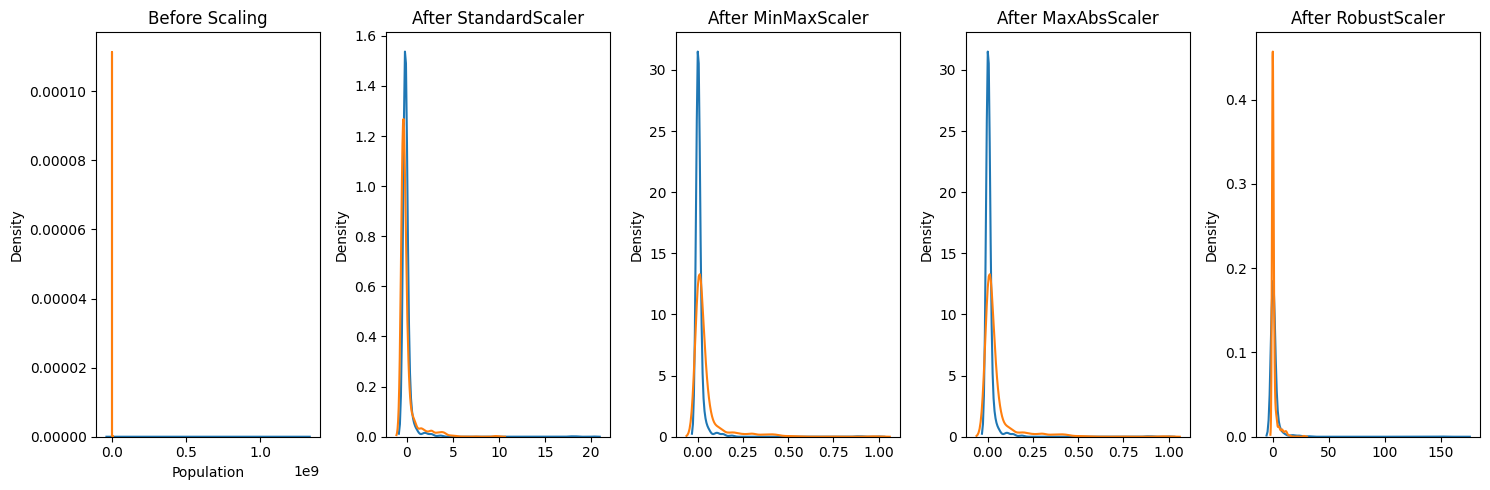

In [176]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler

# Define the columns to scale
column_to_scale = ['Population', 'GDP']

# Check if the columns exist in the DataFrame
missing_columns = [col for col in column_to_scale if col not in df.columns]
if missing_columns:
    raise ValueError(f"The following columns are missing in the DataFrame: {missing_columns}")

# Define the scalers
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'MaxAbsScaler': MaxAbsScaler(),
    'RobustScaler': RobustScaler()
}

# Create subplots for each scaler
fig, axes = plt.subplots(ncols=len(scalers) + 1, figsize=(15, 5))

# Plot the original data before scaling
axes[0].set_title('Before Scaling')
for col in column_to_scale:
    sns.kdeplot(df[col], ax=axes[0])

# Apply scaling and plot the scaled data for each scaler
for i, (scaler_name, scaler) in enumerate(scalers.items(), start=1):
    scaled_df = scaler.fit_transform(df[column_to_scale])
    axes[i].set_title(f'After {scaler_name}')
    for j, col in enumerate(column_to_scale):
        sns.kdeplot(scaled_df[:, j], ax=axes[i])

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

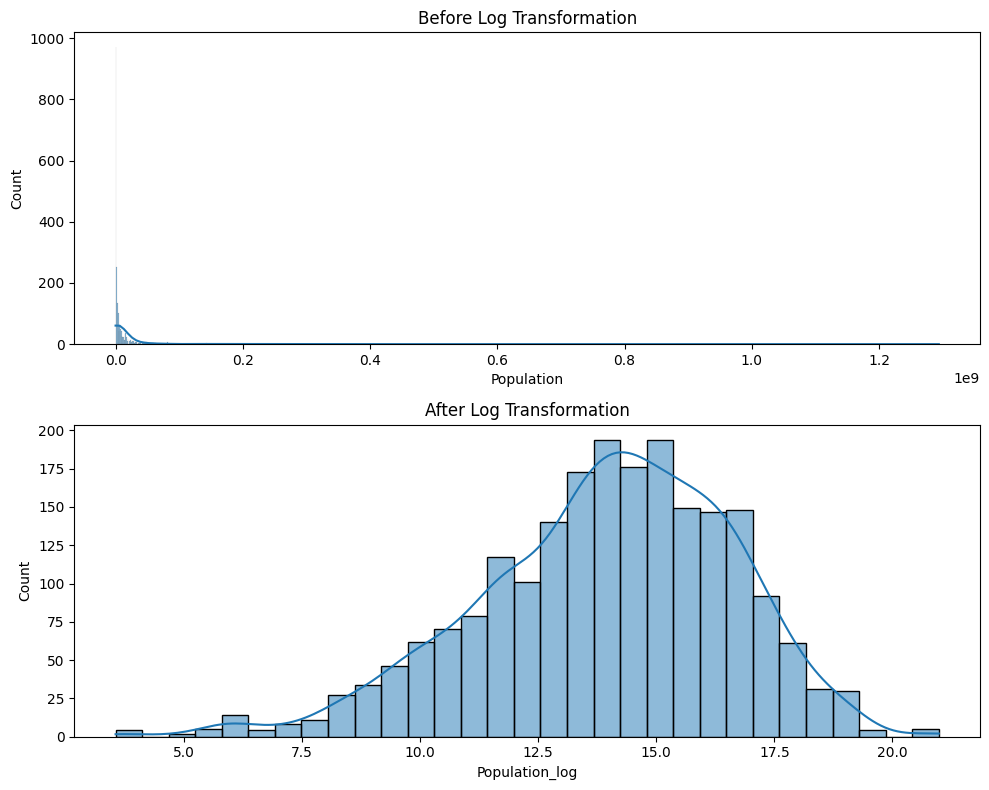

In [177]:
# Apply log transformation to the 'Population' column and create a new column 'Population_log'
df['Population_log'] = np.log1p(df['Population'])

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=2, figsize=(10, 8))

# Plot the 'Population' column before log transformation
axes[0].set_title('Before Log Transformation')
sns.histplot(df['Population'], kde=True, ax=axes[0])

# Plot the 'Population_log' column after log transformation
axes[1].set_title('After Log Transformation')
sns.histplot(df['Population_log'], kde=True, ax=axes[1])

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

#Making Categorical Data

Due to the lack of categorical data, the BMI feature will be converted into categorical values.

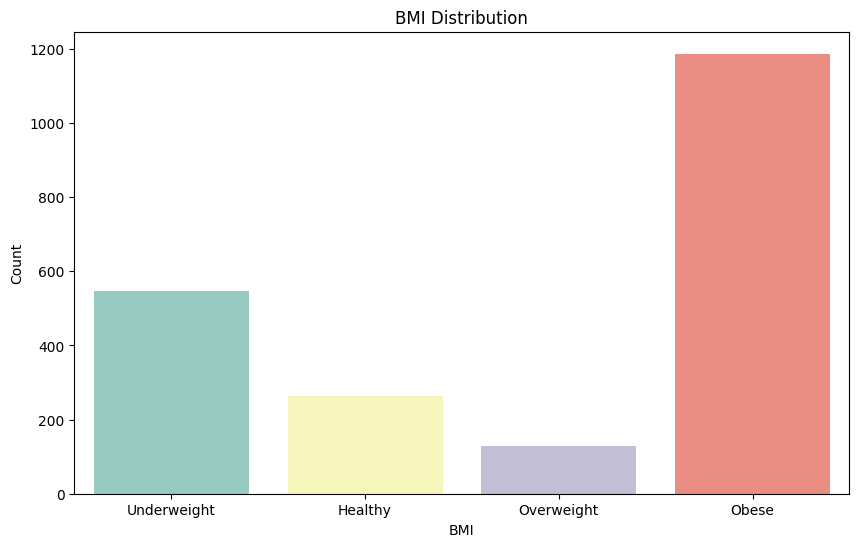

In [178]:
# Define the bins and labels for BMI categories
bins = [0, 18.5, 24.9, 29.9, np.inf]
labels = ['Underweight', 'Healthy', 'Overweight', 'Obese']

# Categorize the 'BMI' column based on the defined bins and labels
df['BMI'] = pd.cut(df['BMI'], bins=bins, labels=labels)

# Create a figure for the count plot
plt.figure(figsize=(10,6))

# Plot the count of each BMI category using a bar plot
sns.countplot(data=df, x='BMI', order=['Underweight', 'Healthy', 'Overweight', 'Obese'], palette="Set3")

# Set the title, x-label, and y-label of the plot
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')

# Display the plot
plt.show()

Due to the lack of categorical data, the GDP feature will also be converted into categorical values.

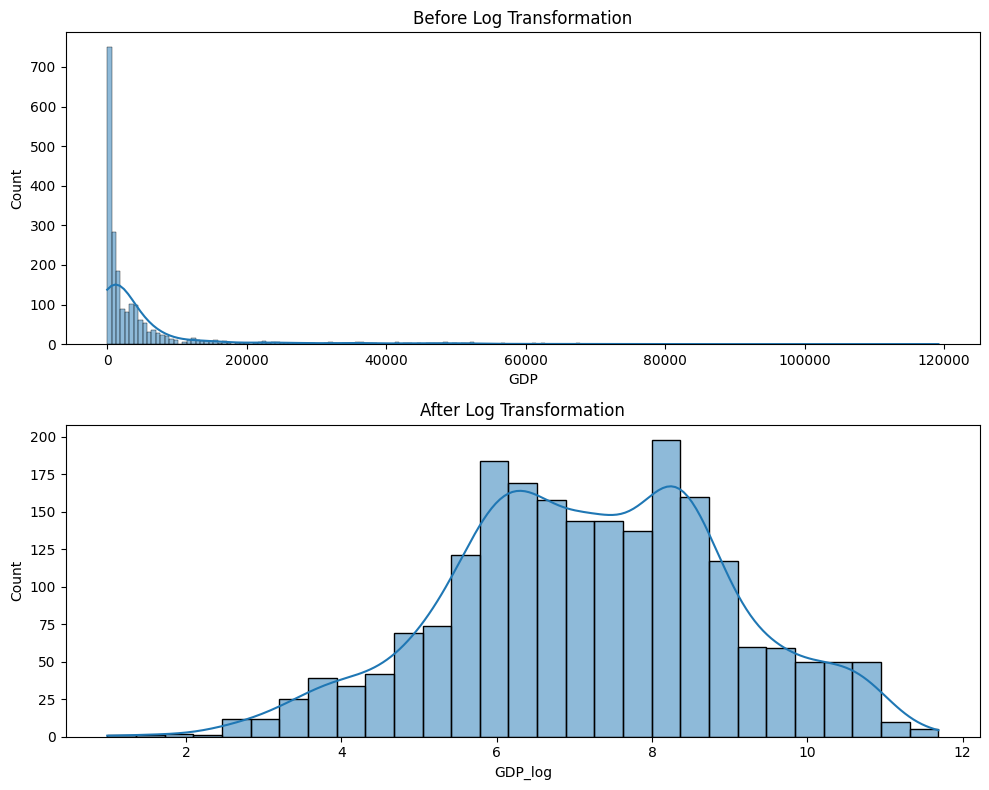

In [179]:
# Apply log transformation to the 'GDP' column and create a new column 'GDP_log'
df['GDP_log'] = np.log1p(df['GDP'])

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=2, figsize=(10, 8))

# Plot the 'GDP' column before log transformation
axes[0].set_title('Before Log Transformation')
sns.histplot(df['GDP'], kde=True, ax=axes[0])

# Plot the 'GDP_log' column after log transformation
axes[1].set_title('After Log Transformation')
sns.histplot(df['GDP_log'], kde=True, ax=axes[1])

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

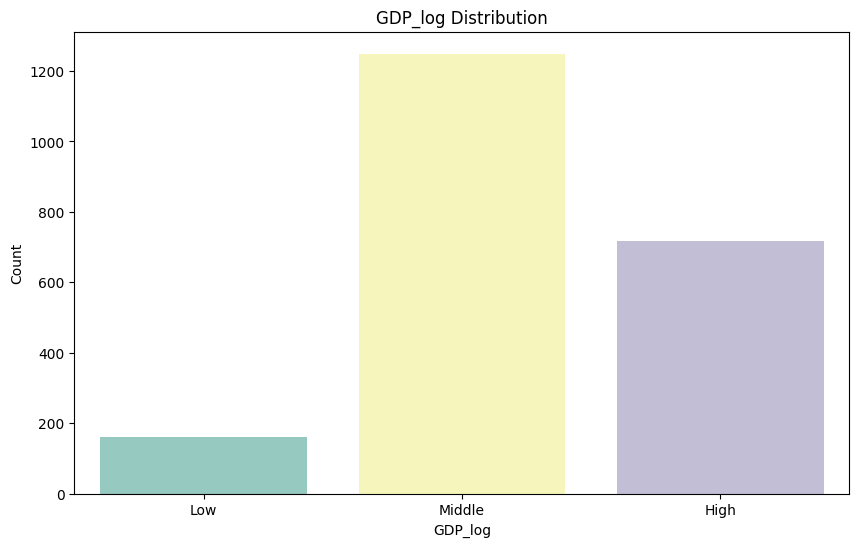

In [180]:
# Divide the 'GDP_log' column into equally spaced intervals
df['GDP_log'] = pd.cut(df['GDP_log'], bins=3, labels=['Low', 'Middle', 'High'])

# Create a figure for the count plot
plt.figure(figsize=(10,6))

# Plot the count of each GDP_log category using a bar plot
sns.countplot(data=df, x='GDP_log', order=['Low', 'Middle', 'High'], palette="Set3")

# Set the title, x-label, and y-label of the plot
plt.title('GDP_log Distribution')
plt.xlabel('GDP_log')
plt.ylabel('Count')

# Display the plot
plt.show()

Due to the limited availability of categorical data, the log-transformed population feature will also be converted into categorical values.

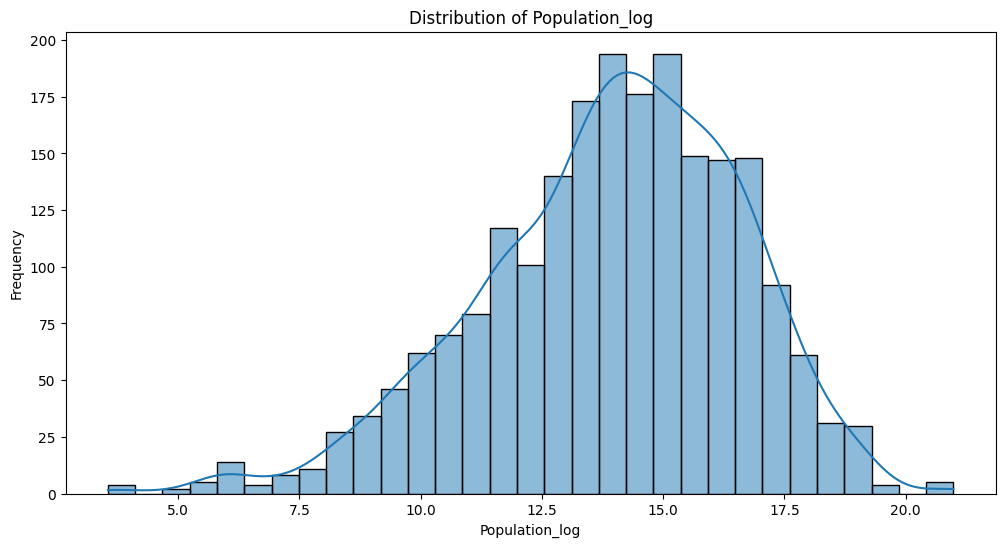

In [181]:
# Create a figure for the histogram plot
plt.figure(figsize=(12, 6))

# Plot the histogram of the 'Population_log' column with a kernel density estimation (kde) curve
sns.histplot(df['Population_log'], kde=True)

# Set the title, x-label, and y-label of the plot
plt.title('Distribution of Population_log')
plt.xlabel('Population_log')
plt.ylabel('Frequency')

# Display the plot
plt.show()

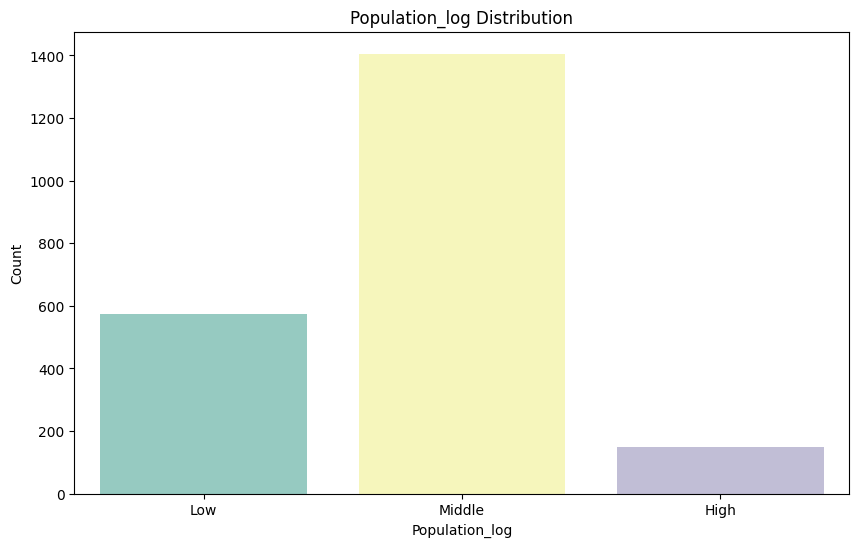

In [182]:
# Divide the 'Population_log' column into equally spaced intervals
df['Population_log'] = pd.cut(df['Population_log'], bins=[0, 12.5, 17.5, np.inf], labels=['Low', 'Middle', 'High'])

# Create a figure for the count plot
plt.figure(figsize=(10,6))

# Plot the count of each Population_log category using a bar plot
sns.countplot(data=df, x='Population_log', order=['Low', 'Middle', 'High'], palette="Set3")

# Set the title, x-label, and y-label of the plot
plt.title('Population_log Distribution')
plt.xlabel('Population_log')
plt.ylabel('Count')

# Display the plot
plt.show()

In [183]:
df['Status'] = df['Status'].astype('category')

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2128 entries, 15 to 2922
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Country                 2128 non-null   object  
 1   Year                    2128 non-null   int64   
 2   Status                  2128 non-null   category
 3   Life expectancy         2128 non-null   float64 
 4   Adult Mortality         2128 non-null   float64 
 5   infant deaths           2128 non-null   int64   
 6   Alcohol                 2128 non-null   float64 
 7   percentage expenditure  2128 non-null   float64 
 8   Hepatitis B             2128 non-null   float64 
 9   Measles                 2128 non-null   int64   
 10  BMI                     2128 non-null   category
 11  under-five deaths       2128 non-null   int64   
 12  Polio                   2128 non-null   float64 
 13  Total expenditure       2128 non-null   float64 
 14  Diphtheria             

#Data Encoding

In [185]:
# Import the necessary library
from sklearn.preprocessing import OrdinalEncoder

# Define a function to encode a column using OrdinalEncoder
def encode_column(df, column_name, new_column_name):
    X = df[column_name].values.reshape(-1, 1)  # Reshape the column values for encoding

    enc = OrdinalEncoder()  # Create an instance of the OrdinalEncoder

    df[new_column_name] = enc.fit_transform(X).ravel()  # Fit and transform the column values and assign to a new column

    return df

# Define the columns to encode and their corresponding new column names
columns_to_encode = {
    'Status': 'Status_encoded',
    'BMI': 'BMI_encoded',
    'GDP_log': 'GDP_log_encoded',
    'Population_log': 'Population_log_encoded'
}

# Iterate over the columns_to_encode dictionary and apply the encode_column function
for original_column, new_column in columns_to_encode.items():
    df = encode_column(df, original_column, new_column)

# Display a subset of columns before and after encoding
df[['Status', 'Status_encoded', 'BMI', 'BMI_encoded', 'GDP_log', 'GDP_log_encoded', 'Population_log', 'Population_log_encoded']].head(100)

,Status,Status_encoded,BMI,BMI_encoded,GDP_log,GDP_log_encoded,Population_log,Population_log_encoded
15,Developing,1.0,Underweight,3.0,Middle,2.0,Middle,2.0
14,Developing,1.0,Underweight,3.0,Middle,2.0,Middle,2.0
13,Developing,1.0,Underweight,3.0,Middle,2.0,Middle,2.0
12,Developing,1.0,Underweight,3.0,Middle,2.0,Middle,2.0
11,Developing,1.0,Underweight,3.0,Middle,2.0,Middle,2.0
...,...,...,...,...,...,...,...,...
96,Developing,1.0,Obese,1.0,Middle,2.0,Middle,2.0
127,Developed,0.0,Obese,1.0,Middle,2.0,Low,1.0
126,Developed,0.0,Obese,1.0,High,0.0,Low,1.0
125,Developed,0.0,Obese,1.0,Middle,2.0,Low,1.0


In [186]:
# Import the necessary library
from sklearn.preprocessing import OneHotEncoder

# Define a function to print encoded values
def print_encoded_values(df, column_name):
    X = df[column_name].values.reshape(-1, 1)  # Reshape the column values for encoding
    enc = OneHotEncoder(sparse=False)  # Create an instance of the OneHotEncoder
    onehotlabels = enc.fit_transform(X)  # Fit and transform the column values to one-hot encoded labels

    # Print the original and encoded values for a subset of rows
    for orig, encoded in zip(df[column_name][90:100], onehotlabels[90:100]):
        print(f'Original: {orig}, Encoded: {encoded}')

# Define the columns to encode
columns_to_encode = ['Status', 'BMI', 'GDP_log', 'Population_log']

# Iterate over the columns_to_encode list and print the encoding results
for column in columns_to_encode:
    print(f"Encoding results for {column}:")
    print_encoded_values(df, column)
    print("\n")

Encoding results for Status:
Original: Developing, Encoded: [0. 1.]
Original: Developing, Encoded: [0. 1.]
Original: Developing, Encoded: [0. 1.]
Original: Developing, Encoded: [0. 1.]
Original: Developing, Encoded: [0. 1.]
Original: Developing, Encoded: [0. 1.]
Original: Developed, Encoded: [1. 0.]
Original: Developed, Encoded: [1. 0.]
Original: Developed, Encoded: [1. 0.]
Original: Developed, Encoded: [1. 0.]


Encoding results for BMI:
Original: Obese, Encoded: [0. 1. 0. 0.]
Original: Obese, Encoded: [0. 1. 0. 0.]
Original: Obese, Encoded: [0. 1. 0. 0.]
Original: Obese, Encoded: [0. 1. 0. 0.]
Original: Obese, Encoded: [0. 1. 0. 0.]
Original: Obese, Encoded: [0. 1. 0. 0.]
Original: Obese, Encoded: [0. 1. 0. 0.]
Original: Obese, Encoded: [0. 1. 0. 0.]
Original: Obese, Encoded: [0. 1. 0. 0.]
Original: Underweight, Encoded: [0. 0. 0. 1.]


Encoding results for GDP_log:
Original: Middle, Encoded: [0. 0. 1.]
Original: High, Encoded: [1. 0. 0.]
Original: High, Encoded: [1. 0. 0.]
Original:

#3. Regression

Using Health Data

In [187]:
# Import the necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the health-related columns used as features
health_cols = ['Adult Mortality', 'infant deaths', 'Alcohol', 'Hepatitis B', 'Measles',
               'BMI_encoded', 'under-five deaths', 'Polio', 'Diphtheria', 'HIV/AIDS',
               'thinness 10-19 years', 'thinness 5-9 years']

# Define the target column
target_col = 'Life expectancy'

# Get the unique countries in the dataframe
countries = df['Country'].unique()

# Initialize a list to store the results
results = []

# Iterate over each country
for country in countries:
    # Filter the data for the current country
    country_data = df[df['Country'] == country]

    # Split the data into train and test sets based on the year
    train_data = country_data[country_data['Year'] <= 2012]
    test_data = country_data[country_data['Year'] > 2012]

    # Prepare the train and test sets
    X_train = train_data[health_cols]
    y_train = train_data[target_col]
    X_test = test_data[health_cols]
    y_test = test_data[target_col]

    # Initialize and fit the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    predictions = model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Store the results for the current country
    results.append({
        'Country': country,
        'Actual': y_test.values,
        'Predicted': np.round_(predictions, 1),
        'MSE': mse,
        'MAE': mae,
        'R2': r2
    })

# Create a dataframe to store the results
h_results_df = pd.DataFrame(results)

# Sort the dataframe by MSE and display the top 10 countries
h_results_df.sort_values(by='MSE').head(10)

,Country,Actual,Predicted,MSE,MAE,R2
74,Malaysia,"[74.6, 74.8, 75.0]","[74.6, 74.9, 75.0]",0.002992,0.049168,0.887803
13,Benin,"[59.5, 59.7, 60.0]","[59.6, 59.8, 60.2]",0.022728,0.136178,0.461706
18,Bulgaria,"[74.1, 74.3, 74.5]","[74.0, 74.1, 74.4]",0.026928,0.155815,-0.009811
28,China,"[75.6, 75.8, 76.1]","[75.5, 75.7, 75.8]",0.031081,0.160936,0.263878
104,Sao Tome and Principe,"[67.1, 67.3, 67.5]","[67.2, 67.6, 67.7]",0.042354,0.192380,-0.588263
128,Uruguay,"[76.8, 76.8, 77.0]","[76.6, 76.6, 76.7]",0.048113,0.215773,-4.412668
106,Serbia,"[75.3, 75.4, 75.6]","[75.3, 75.2, 75.3]",0.057771,0.208684,-2.713838
36,Ecuador,"[76.0, 76.0, 76.2]","[76.2, 76.2, 75.9]",0.065486,0.249944,-6.367166
52,Guyana,"[65.9, 66.0, 66.2]","[65.8, 65.8, 65.8]",0.076952,0.246962,-3.946943
109,Solomon Islands,"[68.8, 68.8, 69.2]","[69.0, 69.0, 68.7]",0.103533,0.300682,-1.911856


Using Finance Data

In [188]:
# Import the necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the finance-related columns used as features
finance_cols = ['percentage expenditure', 'Total expenditure', 'GDP', 'Population', 'GDP_log_encoded', 'Population_log_encoded']

# Define the target column
target_col = 'Life expectancy'

# Get the unique countries in the dataframe
countries = df['Country'].unique()

# Initialize a list to store the results
results = []

# Iterate over each country
for country in countries:
    # Filter the data for the current country
    country_data = df[df['Country'] == country]

    # Split the data into train and test sets based on the year
    train_data = country_data[country_data['Year'] <= 2012]
    test_data = country_data[country_data['Year'] > 2012]

    # Prepare the train and test sets
    X_train = train_data[finance_cols]
    y_train = train_data[target_col]
    X_test = test_data[finance_cols]
    y_test = test_data[target_col]

    # Initialize and fit the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    predictions = model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Store the results for the current country
    results.append({
        'Country': country,
        'Actual': y_test.values,
        'Predicted': np.round_(predictions, 1),
        'MSE': mse,
        'MAE': mae,
        'R2': r2
    })

# Create a dataframe to store the results
f_results_df = pd.DataFrame(results)

# Sort the dataframe by MSE and display the top 10 countries
f_results_df.sort_values(by='MSE').head(10)

,Country,Actual,Predicted,MSE,MAE,R2
93,Panama,"[77.5, 77.6, 77.8]","[77.4, 77.4, 77.6]",0.035692,0.173236,-1.294485
12,Belize,"[69.8, 70.0, 71.0]","[69.8, 69.9, 70.4]",0.117721,0.243773,0.572785
128,Uruguay,"[76.8, 76.8, 77.0]","[77.3, 77.1, 76.9]",0.128300,0.317881,-13.433757
31,Costa Rica,"[79.4, 79.5, 79.6]","[79.1, 79.1, 79.2]",0.146649,0.380965,-20.997359
42,Fiji,"[69.6, 69.7, 69.9]","[69.6, 69.0, 69.8]",0.170301,0.261601,-9.947952
123,Tunisia,"[74.9, 75.1, 75.3]","[75.0, 74.9, 74.4]",0.268858,0.409311,-9.082165
29,Colombia,"[74.4, 74.6, 74.8]","[75.0, 74.7, 75.6]",0.318872,0.502590,-10.957713
121,Tonga,"[73.2, 73.3, 73.5]","[72.8, 72.9, 72.6]",0.359210,0.560484,-22.092050
45,Georgia,"[74.5, 74.5, 74.4]","[74.4, 74.1, 75.4]",0.395587,0.483225,-177.014368
107,Seychelles,"[72.9, 73.0, 73.2]","[72.7, 72.3, 72.3]",0.454571,0.596454,-28.222436


Self Q. How did the performance of the models trained on health-related features compare to those trained on financial features? Which set of features resulted in better predictions for life expectancy on average?

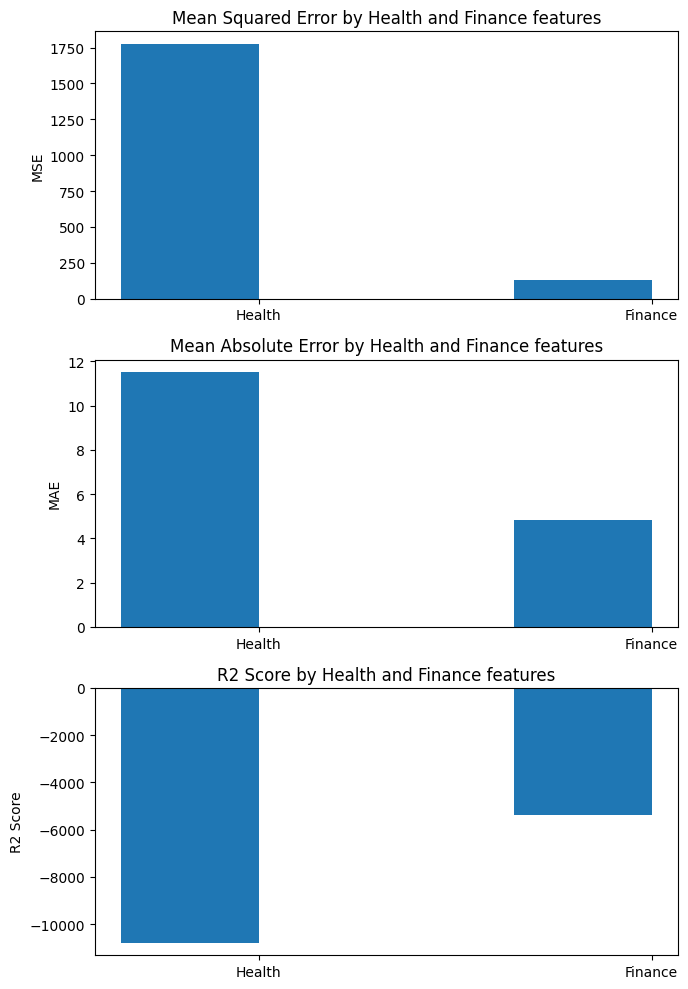

In [189]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the average MSE, MAE, and R2 for health features
avg_mse_health = h_results_df['MSE'].mean()
avg_mae_health = h_results_df['MAE'].mean()
avg_r2_health = h_results_df['R2'].mean()

# Calculate the average MSE, MAE, and R2 for finance features
avg_mse_finance = f_results_df['MSE'].mean()
avg_mae_finance = f_results_df['MAE'].mean()
avg_r2_finance = f_results_df['R2'].mean()

# Create the x-axis values and width for the bars
x = np.arange(2)
width = 0.35

# Create a figure with 3 subplots
fig, axs = plt.subplots(3, figsize=(7, 10))

# Plot the MSE values
axs[0].bar(x - width/2, [avg_mse_health, avg_mse_finance], width)
axs[0].set_ylabel('MSE')
axs[0].set_title('Mean Squared Error by Health and Finance features')
axs[0].set_xticks(x)
axs[0].set_xticklabels(['Health', 'Finance'])

# Plot the MAE values
axs[1].bar(x - width/2, [avg_mae_health, avg_mae_finance], width)
axs[1].set_ylabel('MAE')
axs[1].set_title('Mean Absolute Error by Health and Finance features')
axs[1].set_xticks(x)
axs[1].set_xticklabels(['Health', 'Finance'])

# Plot the R2 values
axs[2].bar(x - width/2, [avg_r2_health, avg_r2_finance], width)
axs[2].set_ylabel('R2 Score')
axs[2].set_title('R2 Score by Health and Finance features')
axs[2].set_xticks(x)
axs[2].set_xticklabels(['Health', 'Finance'])

# Adjust the layout and display the plot
fig.tight_layout()
plt.show()

#4. Classification

In [190]:
# Import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the features and target column
features = ['Life expectancy', 'BMI_encoded', 'Population_log_encoded', 'GDP_log_encoded']
target = 'Status'

# Split the data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the decision tree classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8615023474178404
Precision: 0.8558634136329818
Recall: 0.8615023474178404
F1-score: 0.858354092333893


In [191]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_df.head(10)

,Actual,Predicted
357,Developing,Developing
2712,Developing,Developing
2270,Developing,Developing
1301,Developing,Developed
2726,Developing,Developing
390,Developed,Developing
2302,Developing,Developing
870,Developing,Developing
89,Developing,Developing
397,Developed,Developing


In [192]:
from sklearn.metrics import confusion_matrix, classification_report

confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

report = classification_report(y_test, y_pred)
print('\nClassification Report:')
print(report)

Confusion Matrix:
[[ 34  33]
 [ 26 333]]

Classification Report:
              precision    recall  f1-score   support

   Developed       0.57      0.51      0.54        67
  Developing       0.91      0.93      0.92       359

    accuracy                           0.86       426
   macro avg       0.74      0.72      0.73       426
weighted avg       0.86      0.86      0.86       426



AUC: 0.7562214321990858


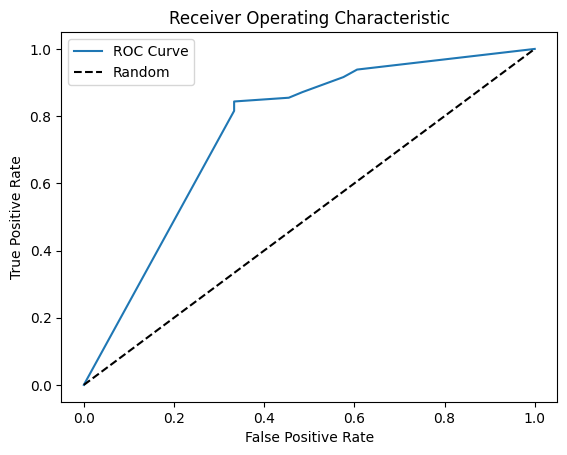

In [199]:
# Import the necessary libraries
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder

# Initialize a LabelEncoder for binary encoding of the target variable
label_encoder = LabelEncoder()

# Transform the target variable to binary representation
y_test_binary = label_encoder.fit_transform(y_test)

# Calculate the predicted probabilities for the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test_binary, y_pred_proba)

# Calculate the False Positive Rate, True Positive Rate, and corresponding thresholds
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_proba)

# Print the AUC value
print("AUC:", roc_auc)

# Plot the ROC Curve
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

In [194]:
# Import the necessary libraries
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Create a KFold object with 10 splits
kf = KFold(n_splits=10, random_state=42, shuffle=True)

# Initialize lists to store evaluation scores and confusion matrices for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []

# Iterate over the folds
fold = 0
for train_index, test_index in kf.split(X):
    fold += 1
    # Split the data into train and test sets based on the fold indices
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and fit the decision tree classifier
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics for the fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Append the evaluation scores to the respective lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Calculate the confusion matrix for the fold
    confusion = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(confusion)

# Create a dataframe to store the evaluation scores for each fold
scores_df = pd.DataFrame({
    'Fold': range(1, fold+1),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-score': f1_scores
})

# Calculate the mean and standard deviation of the evaluation scores
summary_df = pd.DataFrame({
    'Fold': ['Mean', 'Standard Deviation'],
    'Accuracy': [scores_df['Accuracy'].mean(), scores_df['Accuracy'].std()],
    'Precision': [scores_df['Precision'].mean(), scores_df['Precision'].std()],
    'Recall': [scores_df['Recall'].mean(), scores_df['Recall'].std()],
    'F1-score': [scores_df['F1-score'].mean(), scores_df['F1-score'].std()]
})

# Append the summary statistics to the scores dataframe
scores_df = scores_df.append(summary_df, ignore_index=True)

# Display the scores dataframe
scores_df

,Fold,Accuracy,Precision,Recall,F1-score
0,1,0.849765,0.841461,0.849765,0.845212
1,2,0.873239,0.865338,0.873239,0.867853
2,3,0.892019,0.896617,0.892019,0.894062
3,4,0.882629,0.871938,0.882629,0.875670
4,5,0.868545,0.885202,0.868545,0.875308
5,6,0.896714,0.903409,0.896714,0.899592
6,7,0.868545,0.892737,0.868545,0.877271
7,8,0.849765,0.889175,0.849765,0.864083
8,9,0.844340,0.858791,0.844340,0.850470
9,10,0.816038,0.831952,0.816038,0.823023


#5. Clustering

In [195]:
# Import the necessary libraries
from sklearn.cluster import KMeans
from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Define the features to be used for clustering
features = ['Adult Mortality', 'infant deaths', 'Alcohol', 'Hepatitis B', 
               'Measles', 'BMI_encoded', 'under-five deaths', 'Polio', 
               'Diphtheria', 'HIV/AIDS', 'thinness 10-19 years', 'thinness 5-9 years']

# Get the feature data
X = df[features]

# Initialize a StandardScaler and scale the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the parameter grid for KMeans
param_grid = {'n_clusters': list(range(2, 15)), 
              'init': ['k-means++', 'random'], 
              'n_init': [10, 20, 30], 
              'max_iter': [300, 600, 900]}

# Generate all combinations of parameters from the grid
grid = ParameterGrid(param_grid)

# Initialize a list to store the results
results = []

# Iterate over each parameter combination
for params in grid:
    # Initialize and fit the KMeans model
    kmeans = KMeans(**params, random_state=42)
    kmeans.fit(X_scaled)
    
    # Get the cluster labels and calculate the silhouette score
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_scaled, labels)
    
    # Store the results for the current parameter combination
    results.append({**params, 'Silhouette Score': silhouette_avg})

# Create a dataframe to store the results
results_df = pd.DataFrame(results)

# Sort the results dataframe by the silhouette score in descending order
sorted_results_df = results_df.sort_values(by='Silhouette Score', ascending=False)

# Display the top 5 parameter combinations with the highest silhouette scores
sorted_results_df.head(5)

,init,max_iter,n_clusters,n_init,Silhouette Score
0,k-means++,300,2,10,0.320058
39,k-means++,600,2,10,0.320058
197,random,900,2,30,0.320058
196,random,900,2,20,0.320058
195,random,900,2,10,0.320058


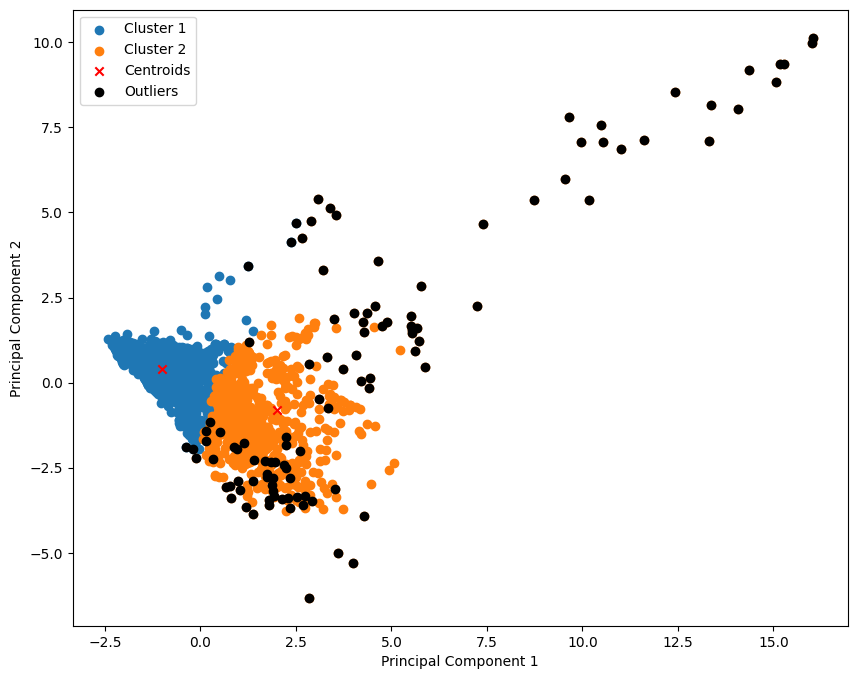

In [196]:
from sklearn.decomposition import PCA

# Get the best parameters from the sorted results dataframe
best_params = sorted_results_df.iloc[0].drop('Silhouette Score').to_dict()

# Initialize and fit the KMeans model with the best parameters
kmeans = KMeans(**best_params, random_state=42)
kmeans.fit(X_scaled)

# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Apply PCA for dimensionality reduction to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centroids_2D = pca.transform(centroids)

# Calculate the distance of each data point from the centroids
distances = np.linalg.norm(X_scaled - centroids[labels], axis=1)

# Calculate the threshold for outliers based on the 95% range
threshold = np.percentile(distances, 95)

# Plot the clustered data and centroids in 2D, coloring outliers differently
plt.figure(figsize=(10, 8))
for i in range(best_params['n_clusters']):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], label=f'Cluster {i+1}')
plt.scatter(centroids_2D[:, 0], centroids_2D[:, 1], c='red', marker='x', label='Centroids')

# Color the outliers differently
outliers = X_pca[distances > threshold]
plt.scatter(outliers[:, 0], outliers[:, 1], c='black', marker='o', label='Outliers')

plt.legend()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()